# Wine Classification with K-Nearest Neighbors (KNN)

This notebook demonstrates a complete machine learning workflow for classifying wine types using K-Nearest Neighbors classifier.

## 1. Setup and Data Loading


### Import Libraries


In [14]:
# Data and model libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('Libraries loaded successfully')


Libraries loaded successfully


### Load Wine Dataset


In [15]:
# Load the default wine dataset
data = load_wine()
print('data.keys(): ', data.keys())

X = data.data       # features (independent variables)
y = data.target     # labels (dependent variables)


data.keys():  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


### Dataset Overview


In [16]:
print('Feature names:', data.feature_names)
print('\nTarget names:', data.target_names)
print('\nData shape:', data.data.shape)
print(f'Number of samples: {data.data.shape[0]}')
print(f'Number of features: {data.data.shape[1]}')
print(f'Number of classes: {len(data.target_names)}')


Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Target names: ['class_0' 'class_1' 'class_2']

Data shape: (178, 13)
Number of samples: 178
Number of features: 13
Number of classes: 3


## 2. Data Preparation


### Train/Validation/Test Split


In [17]:
# Split data into train (70%), validation (15%) and test (15%) sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# stratify=y ensures that the proportion of each class in the train_val set is the same as in the original dataset
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42, stratify=y_train_val)

print('\n')
print(50*'-')
print('Data Split Summary:')
print(f'X_train shape: {X_train.shape[0]}/{X.shape[0]} ({100*round(X_train.shape[0]/X.shape[0], 2):.1f}%)')
print(f'X_val shape: {X_val.shape[0]}/{X.shape[0]} ({100*round(X_val.shape[0]/X.shape[0], 2):.1f}%)')
print(f'X_test shape: {X_test.shape[0]}/{X.shape[0]} ({100*round(X_test.shape[0]/X.shape[0], 2):.1f}%)')
print('\n')




--------------------------------------------------
Data Split Summary:
X_train shape: 124/178 (70.0%)
X_val shape: 27/178 (15.0%)
X_test shape: 27/178 (15.0%)




### Feature Scaling

**Important for KNN**: KNN is distance-based, so feature scaling is crucial. Features with larger scales will dominate the distance calculation.


In [18]:
# Standardize features (mean=0, std=1)
# Fit scaler on training data only to avoid data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print('Features scaled successfully')
print(f'Training set mean (should be ~0): {X_train_scaled.mean():.6f}')
print(f'Training set std (should be ~1): {X_train_scaled.std():.6f}')


Features scaled successfully
Training set mean (should be ~0): 0.000000
Training set std (should be ~1): 1.000000


## 3. Model Training and Hyperparameter Tuning


### Finding Optimal K Value


In [19]:
# Test different values of k (number of neighbors)
k_range = range(1, 21)
train_scores = []
val_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    train_score = knn.score(X_train_scaled, y_train)
    val_score = knn.score(X_val_scaled, y_val)
    
    train_scores.append(train_score)
    val_scores.append(val_score)

# Find best k based on validation score
best_k_idx = np.argmax(val_scores)
best_k = k_range[best_k_idx]
best_val_score = val_scores[best_k_idx]

print(f'Best k: {best_k} (Validation Accuracy: {best_val_score:.4f})')


Best k: 14 (Validation Accuracy: 1.0000)


### Visualizing K vs Accuracy


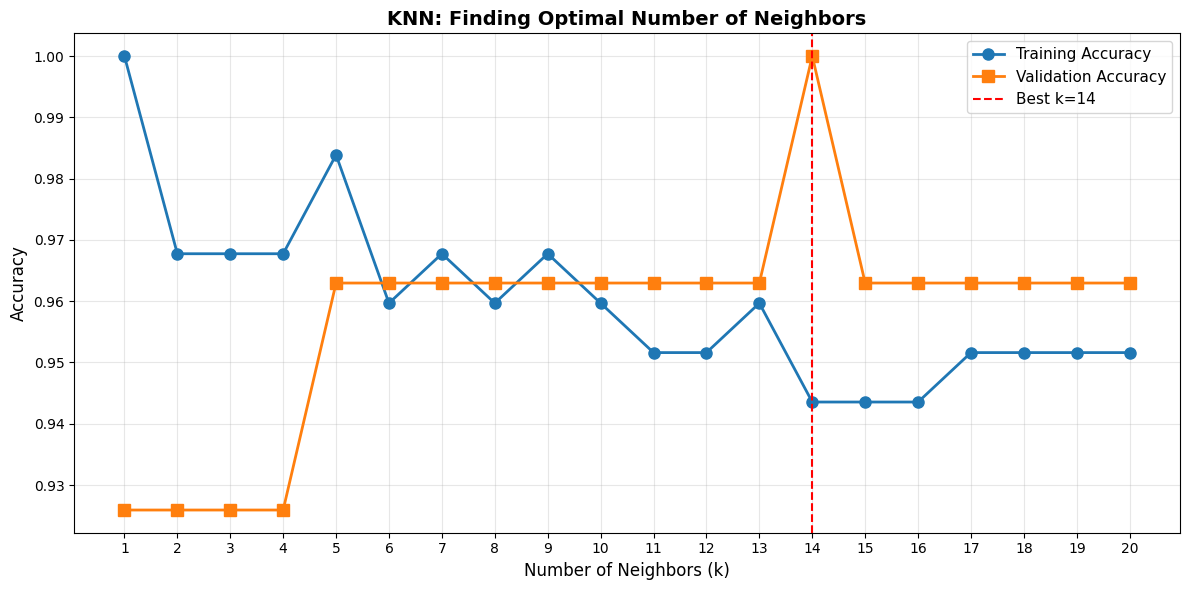


Key Observations:
- Training accuracy decreases as k increases (less overfitting)
- Validation accuracy peaks at k=14
- Gap between train and validation indicates overfitting for small k values


In [20]:
plt.figure(figsize=(12, 6))
plt.plot(k_range, train_scores, 'o-', label='Training Accuracy', linewidth=2, markersize=8)
plt.plot(k_range, val_scores, 's-', label='Validation Accuracy', linewidth=2, markersize=8)
plt.axvline(x=best_k, color='red', linestyle='--', linewidth=1.5, label=f'Best k={best_k}')
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('KNN: Finding Optimal Number of Neighbors', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(k_range)
plt.tight_layout()
plt.show()

print(f'\nKey Observations:')
print(f'- Training accuracy decreases as k increases (less overfitting)')
print(f'- Validation accuracy peaks at k={best_k}')
print(f'- Gap between train and validation indicates overfitting for small k values')


### Train Final Model with Best K


In [21]:
# Train final model with best k
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)

print(f'KNN Model trained with k={best_k}')


KNN Model trained with k=14


## 4. Model Evaluation


In [22]:
# Evaluate on validation set
val_preds = knn_model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, val_preds)
print(f"Validation Accuracy: {val_accuracy:.4f}")


Validation Accuracy: 1.0000


In [23]:
# Evaluate on test set
test_preds = knn_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, test_preds)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.9630


### Understanding Classification Metrics

Before viewing the classification report, let's understand the key metrics:

**Precision**: Of all samples predicted as a class, how many were actually that class?
- Formula: Precision = True Positives / (True Positives + False Positives)
- Interpretation: "When the model says it's class X, how often is it correct?"
- High precision = Few false positives (model rarely incorrectly predicts this class)

**Recall**: Of all actual samples of a class, how many did we correctly identify?
- Formula: Recall = True Positives / (True Positives + False Negatives)
- Interpretation: "Of all actual class X samples, how many did we catch?"
- High recall = Few false negatives (model rarely misses actual samples of this class)

**F1-Score**: Harmonic mean of precision and recall
- Formula: F1 = 2 × (Precision × Recall) / (Precision + Recall)
- Balances precision and recall into a single metric

**Confusion Matrix Components**:
- **True Positives (TP)**: Correctly predicted as the class
- **False Positives (FP)**: Incorrectly predicted as the class (actually another class)
- **False Negatives (FN)**: Actually the class but predicted as another class
- **True Negatives (TN)**: Correctly predicted as not the class

### Classification Report


In [24]:
# Detailed classification report on test set
print("\n" + "="*60)
print("Classification Report - Test Set")
print("="*60)
print(classification_report(y_test, test_preds, target_names=data.target_names))



Classification Report - Test Set
              precision    recall  f1-score   support

     class_0       0.90      1.00      0.95         9
     class_1       1.00      0.91      0.95        11
     class_2       1.00      1.00      1.00         7

    accuracy                           0.96        27
   macro avg       0.97      0.97      0.97        27
weighted avg       0.97      0.96      0.96        27



## 5. Model Performance Visualizations


### Confusion Matrix


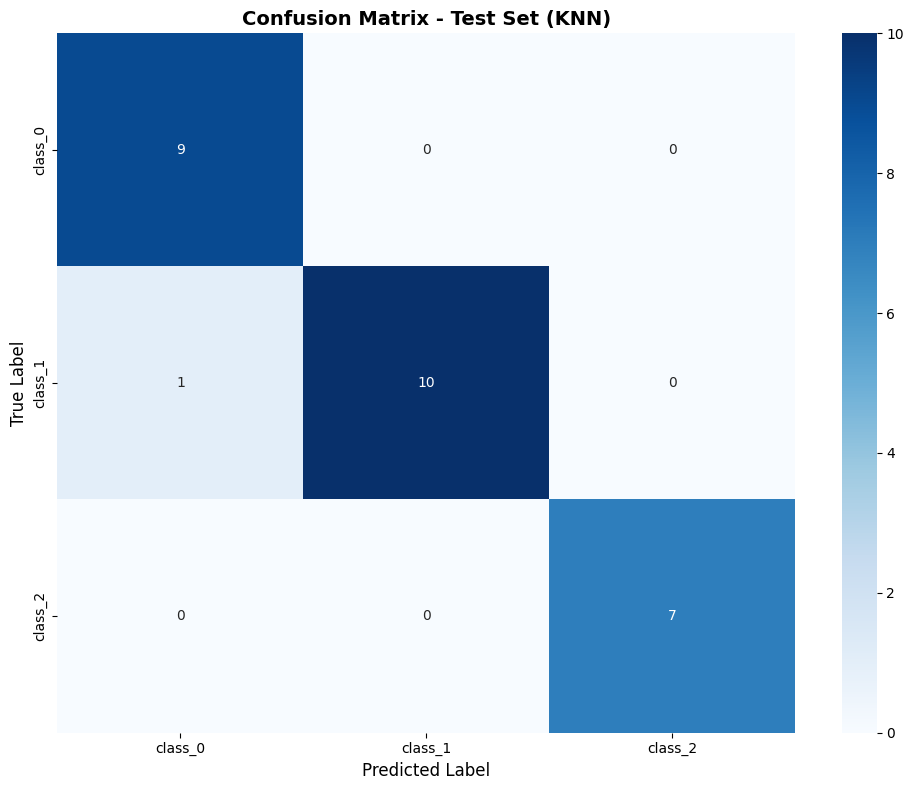


Test Set Accuracy: 0.9630


In [25]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, test_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=data.target_names, 
            yticklabels=data.target_names)
plt.title('Confusion Matrix - Test Set (KNN)', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\nTest Set Accuracy: {test_accuracy:.4f}")


### KNN Decision Boundary Map (2D Projection)

Since we have 13 features, we'll use PCA to project the data into 2D space and visualize how KNN classifies different regions. This helps us understand the decision boundaries of the KNN classifier.


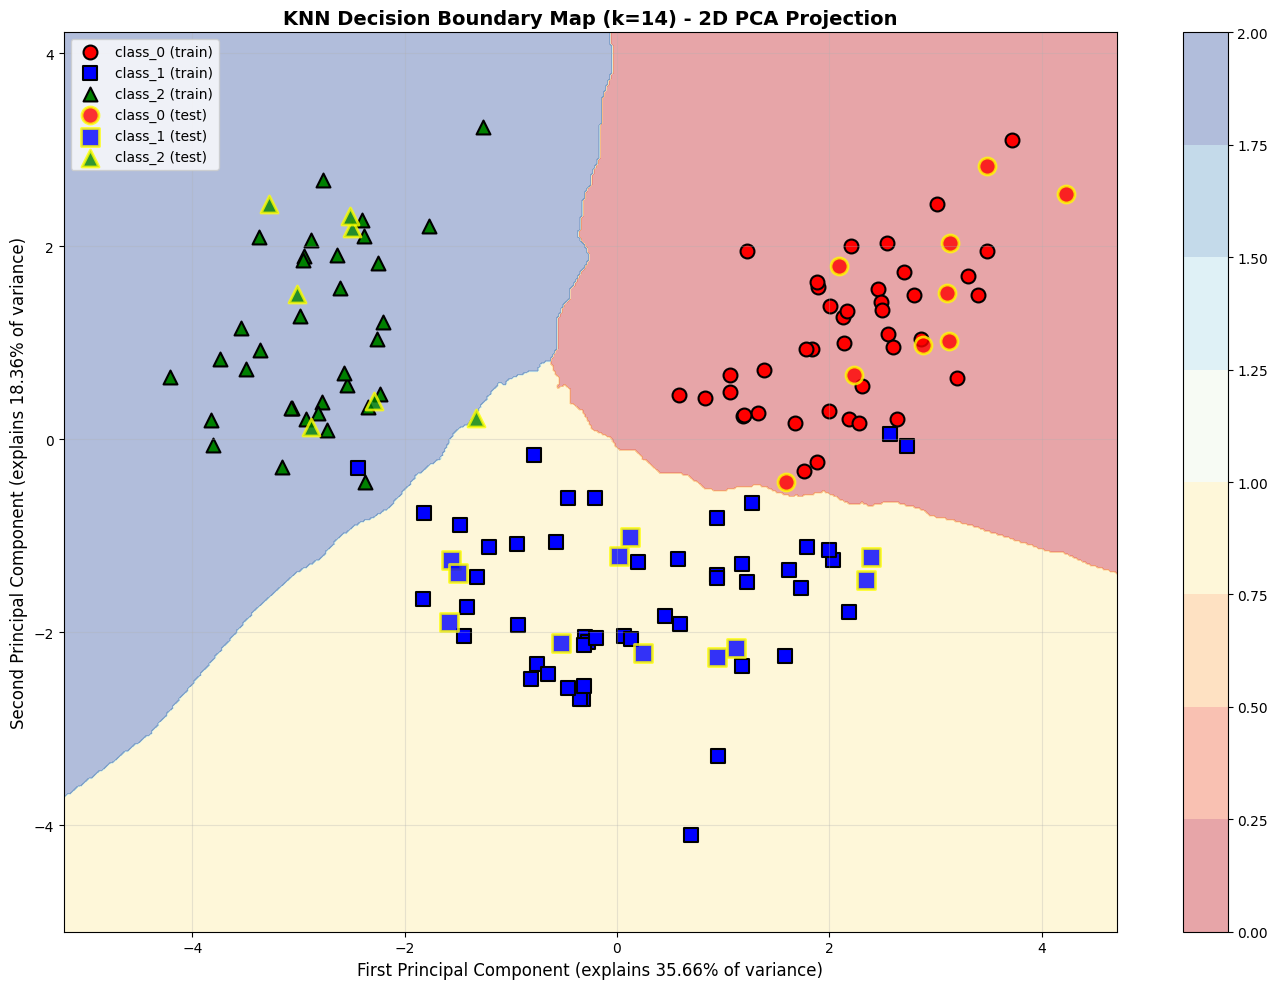


Note: This is a 2D projection of the 13-dimensional feature space using PCA.
The actual KNN model uses all 13 features, but this visualization shows
how KNN creates decision boundaries in a reduced 2D space.


In [26]:
# Import PCA for dimensionality reduction
from sklearn.decomposition import PCA

# Project data to 2D using PCA (for visualization)
pca = PCA(n_components=2, random_state=42)
X_train_2d = pca.fit_transform(X_train_scaled)
X_test_2d = pca.transform(X_test_scaled)

# Train KNN on 2D projected data for visualization
knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_train_2d, y_train)

# Create a mesh to plot decision boundaries
h = 0.02  # Step size in the mesh
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on mesh points
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(14, 10))
# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.colorbar()

# Plot training points
colors = ['red', 'blue', 'green']
markers = ['o', 's', '^']
for i, (color, marker) in enumerate(zip(colors, markers)):
    mask = y_train == i
    plt.scatter(X_train_2d[mask, 0], X_train_2d[mask, 1], 
                c=color, marker=marker, s=100, 
                label=f'{data.target_names[i]} (train)',
                edgecolors='black', linewidths=1.5)

# Plot test points with different style
for i, (color, marker) in enumerate(zip(colors, markers)):
    mask = y_test == i
    plt.scatter(X_test_2d[mask, 0], X_test_2d[mask, 1], 
                c=color, marker=marker, s=150, 
                label=f'{data.target_names[i]} (test)',
                edgecolors='yellow', linewidths=2, alpha=0.8)

plt.xlabel(f'First Principal Component (explains {pca.explained_variance_ratio_[0]:.2%} of variance)', fontsize=12)
plt.ylabel(f'Second Principal Component (explains {pca.explained_variance_ratio_[1]:.2%} of variance)', fontsize=12)
plt.title(f'KNN Decision Boundary Map (k={best_k}) - 2D PCA Projection', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nNote: This is a 2D projection of the 13-dimensional feature space using PCA.")
print(f"The actual KNN model uses all 13 features, but this visualization shows")
print(f"how KNN creates decision boundaries in a reduced 2D space.")


### Performance Comparison: Validation vs Test


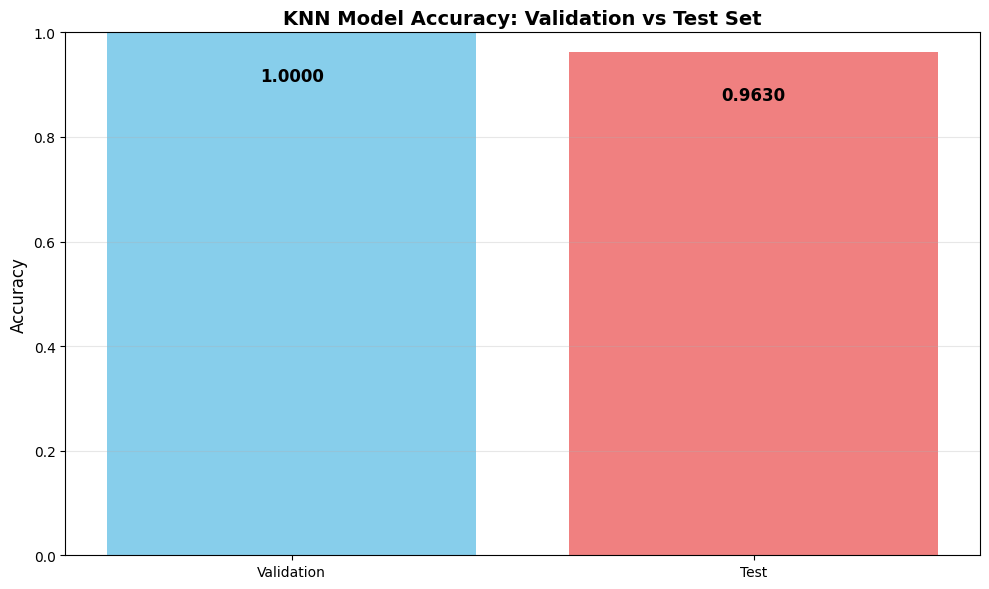

Validation Accuracy: 1.0000
Test Accuracy: 0.9630
Difference: 0.0370


In [28]:
# Compare accuracy on validation and test sets
accuracies = {
    'Validation': val_accuracy,
    'Test': test_accuracy
}

plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'lightcoral'])
plt.title('KNN Model Accuracy: Validation vs Test Set', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, (key, value) in zip(bars, accuracies.items()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.1,
             f'{value:.4f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Difference: {abs(val_accuracy - test_accuracy):.4f}")


---

## Summary

This notebook demonstrated a complete machine learning workflow for wine classification using K-Nearest Neighbors:

1. **Data Loading**: Loaded the wine dataset with 178 samples, 13 features, and 3 classes
2. **Data Preparation**: Implemented a 70:15:15 train/validation/test split with stratification
3. **Feature Scaling**: Standardized features (critical for distance-based KNN)
4. **Hyperparameter Tuning**: Found optimal k value by testing k from 1 to 20
5. **Model Training**: Trained KNN with the best k value
6. **Model Evaluation**: Assessed performance on validation and test sets
7. **Visualizations**: Created confusion matrix and performance comparisons

**Key Takeaways:**
- KNN requires feature scaling since it's distance-based
- Optimal k balances bias and variance (small k = overfitting, large k = underfitting)
- Validation set is crucial for selecting the best hyperparameter
- KNN is simple but can be effective for small to medium datasets

**KNN Characteristics:**
- **Pros**: Simple, interpretable, no assumptions about data distribution, works well for non-linear boundaries
- **Cons**: Computationally expensive for large datasets, sensitive to irrelevant features, requires feature scaling

---
